# Case Study 2 - Logistic  regression

# 2021F-T1 AISC1003 - Machine Learning 1 01 (M07 Group 1)

# Prof. Jagmohan Dutta

# Name : Pratik Domadiya

# Student Id : 500199494

# Task : Logistic  regression on Wine dataset

In [1]:
# Load the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
from sklearn import datasets

# Load the data

In [2]:
# load wine data 
data = datasets.load_wine()
print(data.DESCR) # print description of the whole data

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [14]:
print("features : ",data.feature_names) # print all the features names. Here we have features ['alcohol', 'malic_acid', 
                                        # 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins',
                                        # 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
print(len(data.feature_names))
print("target : ",data.target) # print target feature. we have  classes , 0,1 and 2.

features :  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
13
target :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [4]:
# convert data to pandas dataframe 
data_df=pd.DataFrame(data.data,columns=data.feature_names)
data_df


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
dtypes: float64(13)
memory usage: 18.2 KB


In [6]:
data_df.describe() # print statistical information about data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# checking for outliers

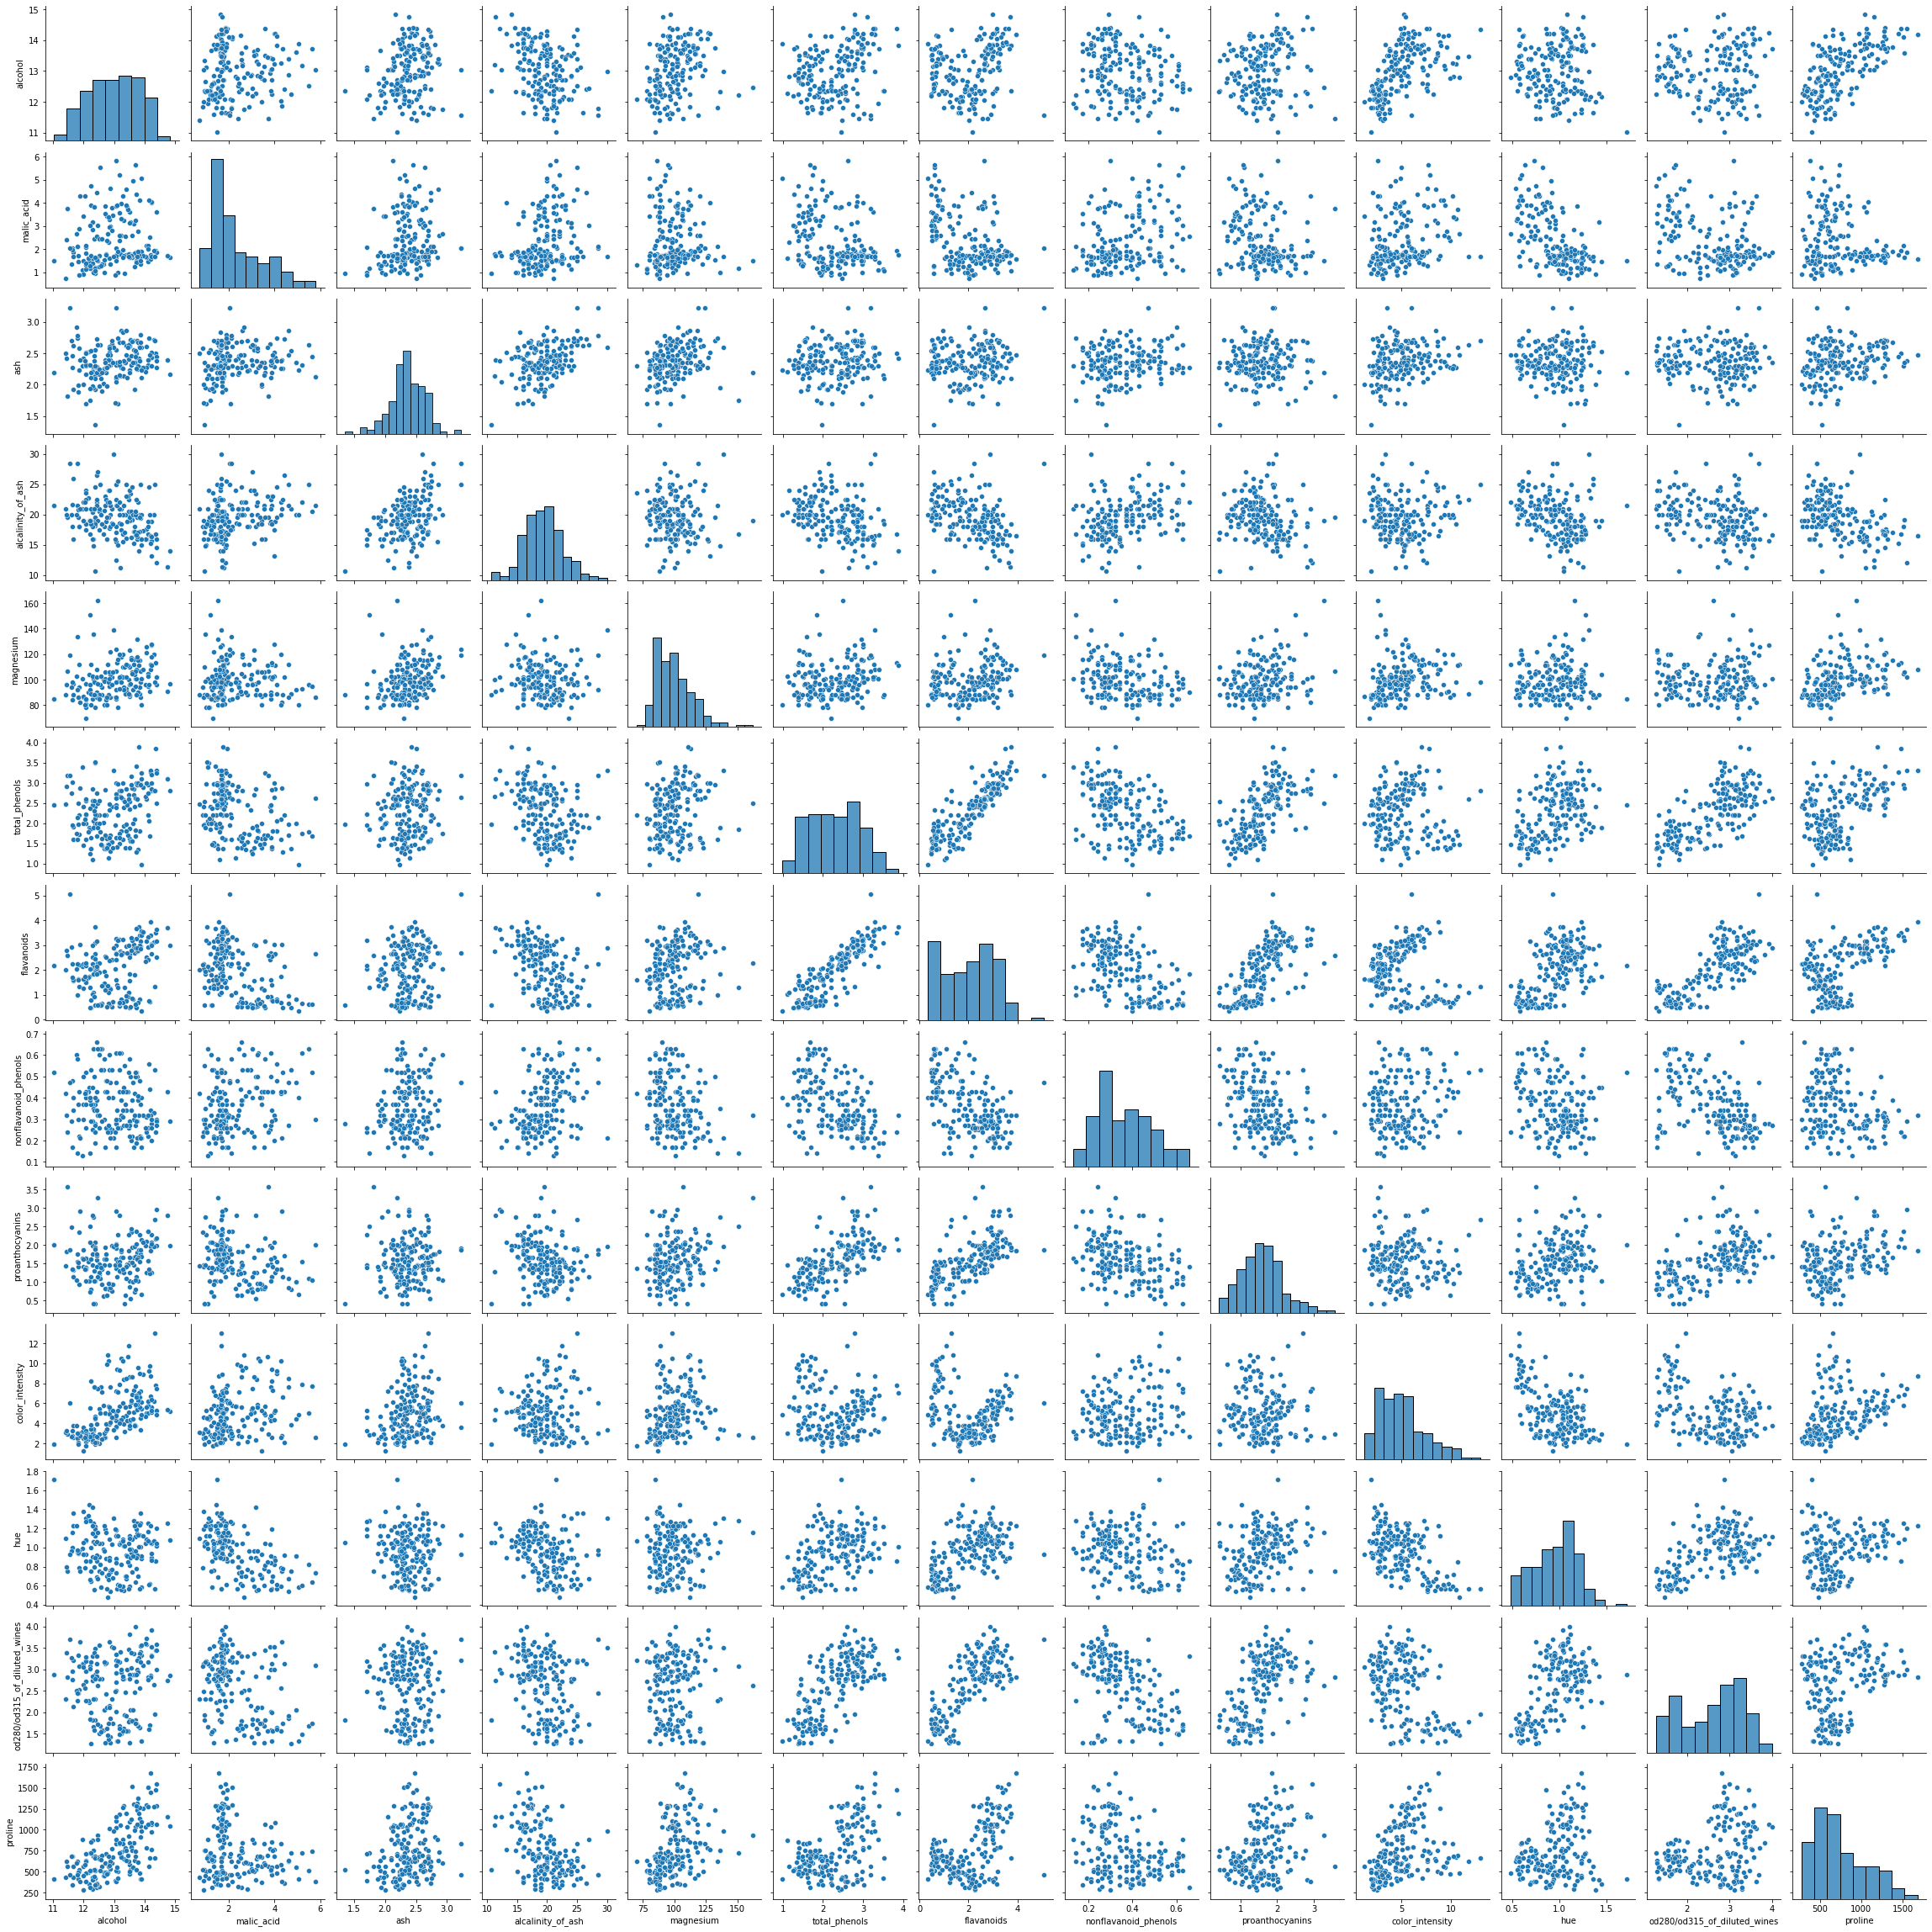

In [7]:
sns.pairplot(data_df)# draw outliers of the data

[Text(0.5, 1.0, 'proline')]

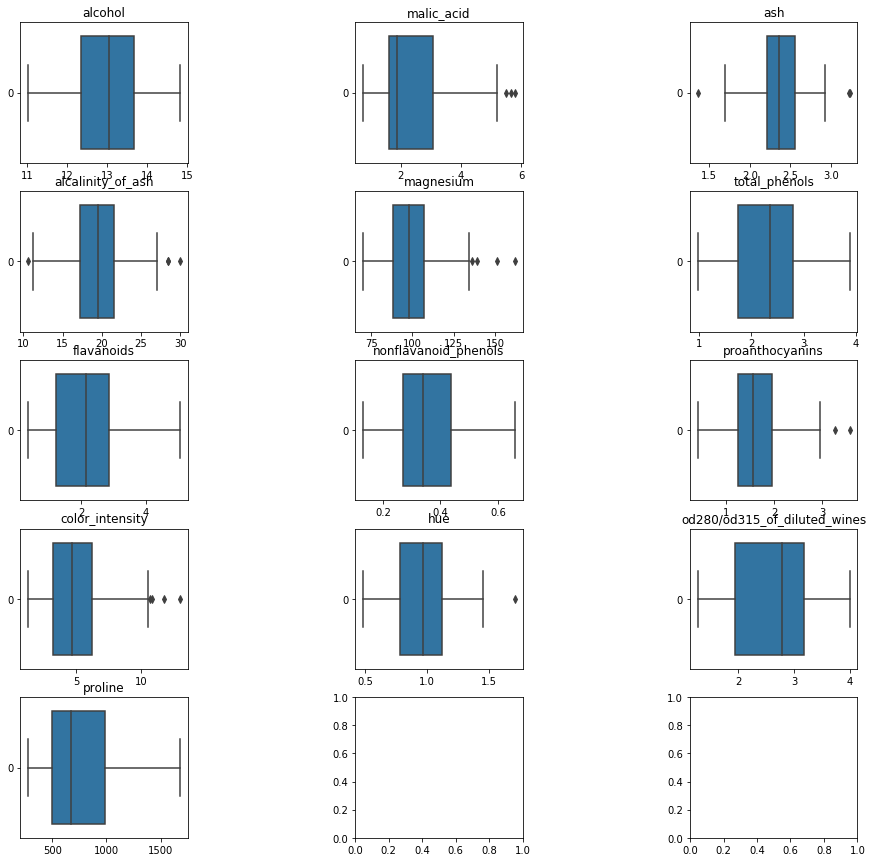

In [27]:
fig, axs = plt.subplots(figsize=(15,15),nrows=5,ncols=3)
plt.subplots_adjust(wspace = 1.0)
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
sns.boxplot(data=data_df['alcohol'],ax=axs[0,0],orient="h").set(title='alcohol')
sns.boxplot(data=data_df['malic_acid'],ax=axs[0,1],orient="h").set(title='malic_acid')
sns.boxplot(data=data_df['ash'],ax=axs[0,2],orient="h").set(title='ash')
sns.boxplot(data=data_df['alcalinity_of_ash'],ax=axs[1,0],orient="h").set(title='alcalinity_of_ash')

sns.boxplot(data=data_df['magnesium'],ax=axs[1,1],orient="h").set(title='magnesium')
sns.boxplot(data=data_df['total_phenols'],ax=axs[1,2],orient="h").set(title='total_phenols')
sns.boxplot(data=data_df['flavanoids'],ax=axs[2,0],orient="h").set(title='flavanoids')
sns.boxplot(data=data_df['nonflavanoid_phenols'],ax=axs[2,1],orient="h").set(title='nonflavanoid_phenols')

sns.boxplot(data=data_df['proanthocyanins'],ax=axs[2,2],orient="h").set(title='proanthocyanins')
sns.boxplot(data=data_df['color_intensity'],ax=axs[3,0],orient="h").set(title='color_intensity')
sns.boxplot(data=data_df['hue'],ax=axs[3,1],orient="h").set(title='hue')
sns.boxplot(data=data_df['od280/od315_of_diluted_wines'],ax=axs[3,2],orient="h").set(title='od280/od315_of_diluted_wines')
sns.boxplot(data=data_df['proline'],ax=axs[4,0],orient="h").set(title='proline')

# malic_acid, ash,alcalinity_of_ash, magnesium,proanthocyanins,color_intensity and hue columns has some outliers either we have to remove it or we have to apply robust scaler on the data.
# here we will go with later option.

In [28]:
# Appplying Robust scaler on the data
X = data_df
print(X)
y = pd.DataFrame(data.target)
print(y)
#model construction
from sklearn.preprocessing import RobustScaler
r_scaler = RobustScaler()
df_scaled = r_scaler.fit_transform(X)
len(df_scaled)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

178

In [84]:
# fig, axs = plt.subplots(figsize=(10,5),nrows=2,ncols=2)
# plt.subplots_adjust(hspace = 0.6)
# sns.boxplot(data=df_scaled[0][0:],ax=axs[0,0],orient="h").set(title='sepal length (cm)')
# sns.boxplot(data=df_scaled[1][0:],ax=axs[0,1],orient="h").set(title='sepal width (cm)')
# sns.boxplot(data=df_scaled[2][0:],ax=axs[1,0],orient="h").set(title='petal length (cm)')
# sns.boxplot(data=df_scaled[3][0:],ax=axs[1,1],orient="h").set(title='petal width (cm)')

# Preparing model

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.2, random_state=42)

X_tr_array = X_train
X_ts_array = X_test
y_tr_array = y_train.as_matrix()
y_ts_array = y_test.as_matrix()

print('Input Shape', (X_tr_array.shape))
print('Output Shape', X_test.shape)

Input Shape (142, 13)
Output Shape (36, 13)


c:\python37\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
c:\python37\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_tr_array, y_tr_array)

c:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
# print (model.intercept_, model.coef_)

In [32]:
pred = model.predict(X_ts_array)# make a prediction of the data

In [33]:
print ('Accuracy from sk-learn: {0}'.format(model.score(X_ts_array, y_ts_array)))# display accuracy of the model

Accuracy from sk-learn: 1.0


Text(0.5, 1, 'Accuracy Score: 1.0')

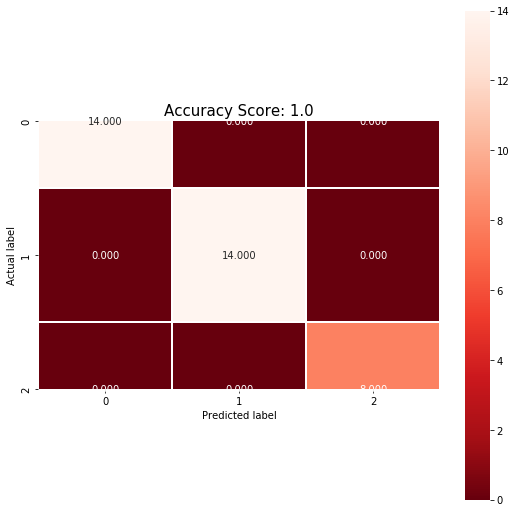

In [34]:
# print confusion metrics
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_ts_array,pred)
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(X_ts_array, y_ts_array))
plt.title(all_sample_title, size = 15)

In [35]:
# display model metrics 
print ('F1 score:', metrics.f1_score(y_ts_array,pred,average='weighted'))# display f1_score 

print ('Recall:', metrics.recall_score(y_ts_array,pred,average='weighted'))# display recall 

print ('Precision:', metrics.precision_score(y_ts_array,pred,average='weighted'))# display precision

print ('\n clasification report:\n', metrics.classification_report(y_ts_array,pred))# display classification report.

F1 score: 1.0
Recall: 1.0
Precision: 1.0

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [87]:
# Referesces
# https://scikit-learn.org/